In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\wine_data.csv",header =None, usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [14]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [15]:
df.shape

(178, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [17]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [18]:
df.isnull().sum()

Class Label    0
Alcohol        0
Malic Acid     0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.corr()

,Class Label,Alcohol,Malic Acid
Class Label,1.000000,-0.328222,0.437776
Alcohol,-0.328222,1.000000,0.094397
Malic Acid,0.437776,0.094397,1.000000


<Axes: ylabel='Frequency'>

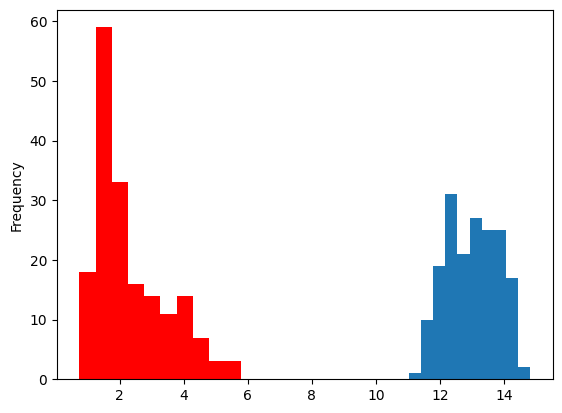

In [24]:
## Alcohol Acid
df['Alcohol'].plot(kind='hist')
## Malic Acid
df['Malic Acid'].plot(kind='hist',color='r')

<Axes: >

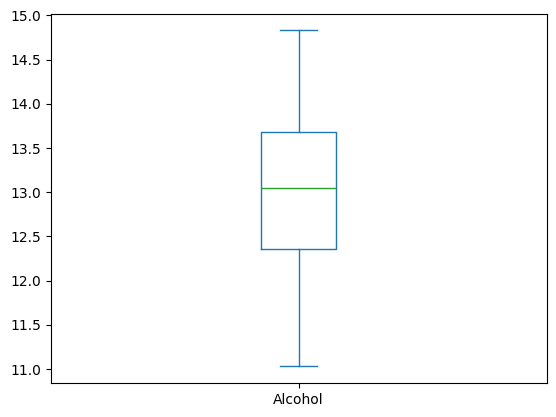

In [26]:
## Alcohol Acid
df['Alcohol'].plot(kind='box')

<Axes: >

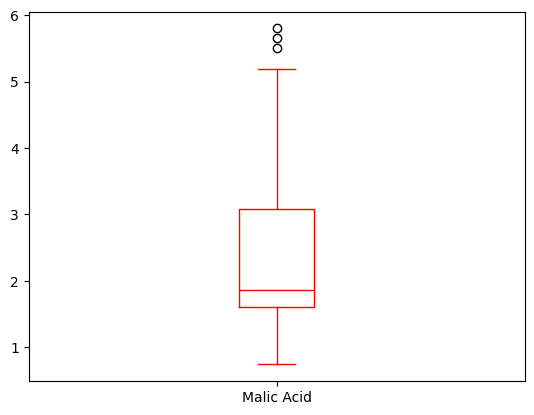

In [27]:
## Malic Acid
df['Malic Acid'].plot(kind='box',color='r')

<Axes: xlabel='Alcohol', ylabel='Density'>

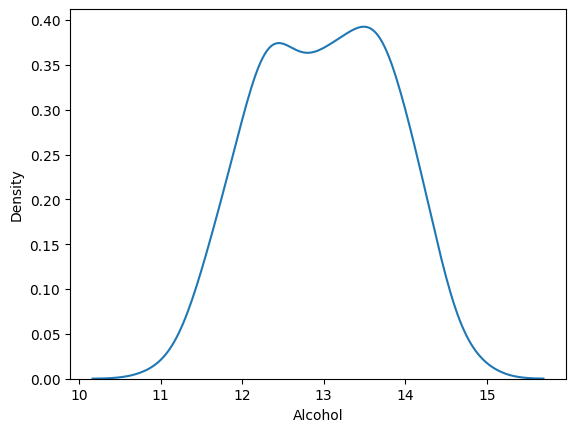

In [28]:
sns.kdeplot(df['Alcohol'])  #bimodel

"Bimodal" describes a distribution or dataset with **two distinct peaks** or "modes." In statistics and data analysis, a mode is the most frequently occurring value or range of values. If a dataset has two separate values or ranges that occur most frequently, it’s called **bimodal**.

### Example of Bimodal Distribution
Imagine you collect the heights of people in two separate age groups, such as children and adults. Plotting these heights might reveal two peaks: one representing the heights of children and another for adults. This is a bimodal distribution because there are two clusters or concentrations of data.

### Key Points:
- **Bimodal** = two modes or peaks.
- **Multimodal** = more than two modes.
- Bimodal distributions often indicate **two underlying groups** or patterns within the data.

Bimodal data can sometimes suggest a need for further analysis to understand why two peaks exist, as it may reveal distinct subpopulations or patterns in the dataset.

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

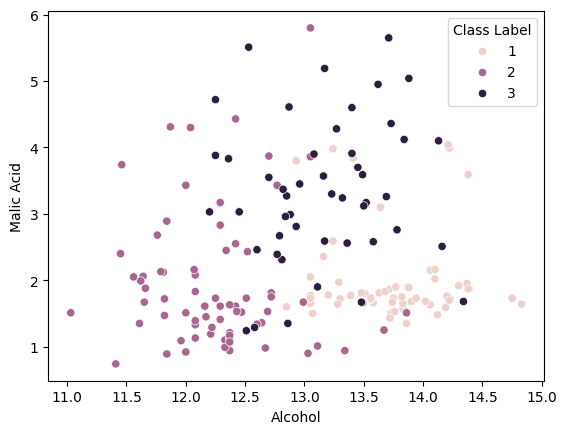

In [30]:
sns.scatterplot(x='Alcohol',y='Malic Acid',data=df,hue='Class Label')

In [32]:
X = df.drop('Class Label',axis=1)
y = df['Class Label']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [66]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [75]:
y_pred = lr.predict(X_test_scaled)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print("Accuracy Score is :",accuracy_score(y_pred,y_test))

Accuracy Score is : 0.7222222222222222
